In [2]:
import sys

In [3]:
import pandas as pd

In [4]:
print(sys.executable)

/Users/waseh/Desktop/aba-behaviour-eda/.venv/bin/python


In [5]:
df = pd.read_csv("../data/aba_behavior_synthetic_v1.csv")
df.head()

,date,client_id,hours_slept,screen_time_hours,sugar_intake,noise_level,routine_change,setting,antecedent,behavior_occurred,behavior_intensity
0,2024-01-01,1001,8.9,3.4,1,7,0,Clinic,Demand,0,1.6
1,2024-01-02,1013,7.4,2.4,1,0,0,School,Attention Removed,1,1.3
2,2024-01-03,1012,9.0,2.7,1,2,0,Home,Demand,0,0.8
3,2024-01-04,1002,6.3,3.0,2,1,1,School,Peer Conflict,1,1.8
4,2024-01-05,1018,5.8,2.3,0,0,1,Clinic,Attention Removed,1,1.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                600 non-null    object 
 1   client_id           600 non-null    int64  
 2   hours_slept         600 non-null    float64
 3   screen_time_hours   600 non-null    float64
 4   sugar_intake        600 non-null    int64  
 5   noise_level         600 non-null    int64  
 6   routine_change      600 non-null    int64  
 7   setting             600 non-null    object 
 8   antecedent          600 non-null    object 
 9   behavior_occurred   600 non-null    int64  
 10  behavior_intensity  600 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 51.7+ KB


In [7]:
df.describe()

,client_id,hours_slept,screen_time_hours,sugar_intake,noise_level,routine_change,behavior_occurred,behavior_intensity
count,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,1009.683333,8.012500,2.523667,1.871667,4.97500,0.485000,0.801667,1.780833
std,5.383124,1.728141,1.216528,1.397062,3.18139,0.500192,0.399077,1.000826
min,1001.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1005.000000,6.900000,1.700000,1.000000,2.00000,0.000000,1.000000,1.100000
50%,1009.000000,8.000000,2.400000,2.000000,5.00000,0.000000,1.000000,1.800000
75%,1014.250000,9.300000,3.325000,3.000000,8.00000,1.000000,1.000000,2.500000
max,1019.000000,12.000000,5.800000,8.000000,10.00000,1.000000,1.000000,4.700000


In [11]:
df["behavior_occurred"].value_counts(normalize=True)

behavior_occurred
1    0.801667
0    0.198333
Name: proportion, dtype: float64

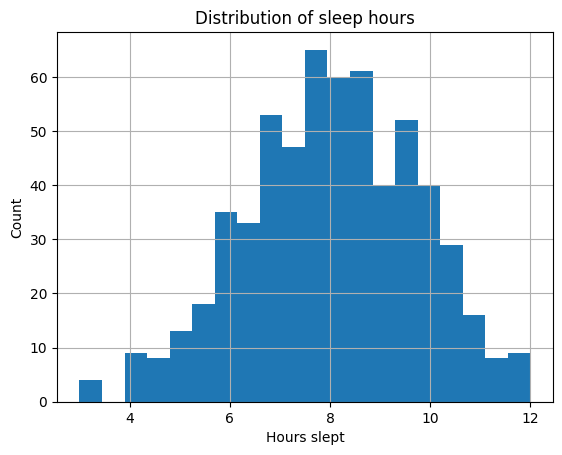

In [12]:
import matplotlib.pyplot as plt

df["hours_slept"].hist(bins=20)
plt.xlabel("Hours slept")
plt.ylabel("Count")
plt.title("Distribution of sleep hours")
plt.show()


In [13]:
df.groupby("setting")["behavior_occurred"].mean()


setting
Clinic    0.810811
Home      0.768889
School    0.836601
Name: behavior_occurred, dtype: float64

In [14]:
df.groupby("antecedent")["behavior_occurred"].mean()


antecedent
Attention Removed    0.744186
Demand               0.895105
Denied Access        0.788136
Peer Conflict        0.720588
Transition           0.809859
Name: behavior_occurred, dtype: float64

In [15]:
df.groupby("setting")["behavior_intensity"].mean()


setting
Clinic    1.674324
Home      1.711111
School    2.037908
Name: behavior_intensity, dtype: float64

In [18]:
df.groupby(df["hours_slept"].round())["behavior_occurred"].mean()


hours_slept
3.0     1.000000
4.0     0.933333
5.0     0.916667
6.0     0.870130
7.0     0.910000
8.0     0.832215
9.0     0.739583
10.0    0.690722
11.0    0.571429
12.0    0.500000
Name: behavior_occurred, dtype: float64

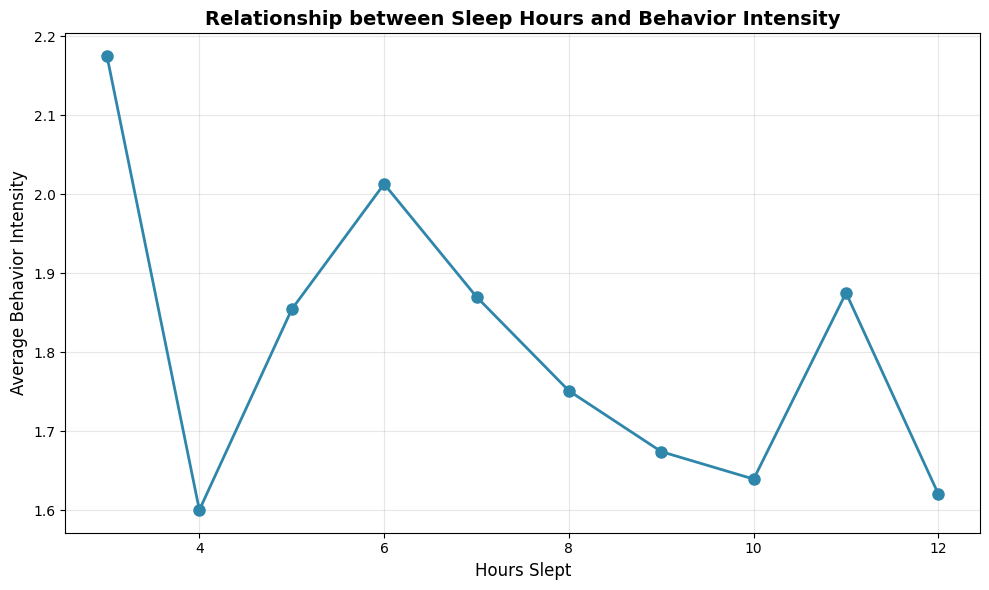

In [19]:
import matplotlib.pyplot as plt

# Group by rounded sleep hours and calculate mean behavior intensity
sleep_intensity = df.groupby(df["hours_slept"].round())["behavior_intensity"].mean()

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(sleep_intensity.index, sleep_intensity.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.xlabel("Hours Slept", fontsize=12)
plt.ylabel("Average Behavior Intensity", fontsize=12)
plt.title("Relationship between Sleep Hours and Behavior Intensity", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()